In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import Queue
import pandas as pd

adjacency_list_cities = {}
shortest_distance_dic = {}
cities_en_dic = {
    "ADANA": 'Adana',
    "ADIYAMAN": 'Adiyaman',
    "AFYONKARAHİSAR": 'Afyonkarahisar',
    "AĞRI": 'Agri',
    "AMASYA": 'Amasya',
    "ANKARA": 'Ankara',
    "ANTALYA": 'Antalya',
    "ARTVİN": 'Artvin',
    "AYDIN": 'Aydin',
    "BALIKESİR": 'Balikesir',
    "BİLECİK": 'Bilecik',
    "BİNGÖL": 'Bingol',
    "BİTLİS": 'Bitlis',
    "BOLU": 'Bolu',
    "BURDUR": 'Burdur',
    "BURSA": 'Bursa',
    "ÇANAKKALE": 'Canakkale',
    "ÇANKIRI": 'Cankiri',
    "ÇORUM": 'Corum',
    "DENİZLİ": 'Denizli',
    "DİYARBAKIR": 'Diyarbakir',
    "EDİRNE": 'Edirne',
    "ELAZIĞ": 'Elazig',
    "ERZİNCAN": 'Erzincan',
    "ERZURUM": 'Erzurum',
    "ESKİŞEHİR": 'Eskisehir',
    "GAZİANTEP": 'Gaziantep',
    "GİRESUN": 'Giresun',
    "GÜMÜŞHANE": 'Gumushane',
    "HAKKARİ": 'Hakkari',
    "HATAY": 'Hatay',
    "ISPARTA": 'Isparta',
    "MERSİN": 'Mersin',
    "İSTANBUL": 'Istanbul',
    "İZMİR": 'Izmir',
    "KARS": 'Kars',
    "KASTAMONU": 'Kastamonu',
    "KAYSERİ": 'Kayseri',
    "KIRKLARELİ": 'Kirklareli',
    "KIRŞEHİR": 'Kirsehir',
    "KOCAELİ (İZMİT)": 'Kocaeli (Izmit)',
    "KONYA": 'Konya',
    "KÜTAHYA": 'Kutahya',
    "MALATYA": 'Malatya',
    "MANİSA": 'Manisa',
    "KAHRAMANMARAŞ": 'Kahramanmaras',
    "MARDİN": 'Mardin',
    "MUĞLA": 'Mugla',
    "MUŞ": 'Mus',
    "NEVŞEHİR": 'Nevsehir',
    "NİĞDE": 'Nigde',
    "ORDU": 'Ordu',
    "RİZE": 'Rize',
    "SAKARYA (ADAPAZARI)": 'Sakarya (Adapazari)',
    "SAMSUN": 'Samsun',
    "SİİRT": 'Siirt',
    "SİNOP": 'Sinop',
    "SİVAS": 'Sivas',
    "TEKİRDAĞ": 'Tekirdag',
    "TOKAT": 'Tokat',
    "TRABZON": 'Trabzon',
    "TUNCELİ": 'Tunceli',
    "ŞANLIURFA": 'Sanliurfa',
    "UŞAK": 'Usak',
    "VAN": 'Van',
    "YOZGAT": 'Yozgat',
    "ZONGULDAK": 'Zonguldak',
    "AKSARAY": 'Aksaray',
    "BAYBURT": 'Bayburt',
    "KARAMAN": 'Karaman',
    "KIRIKKALE": 'Kirikkale',
    "BATMAN": 'Batman',
    "ŞIRNAK": 'Sirnak',
    "BARTIN": 'Bartin',
    "ARDAHAN": 'Ardahan',
    "IĞDIR": 'Igdir',
    "YALOVA": 'Yalova',
    "KARABÜK": 'Karabuk',
    "KİLİS": 'Kilis',
    "OSMANİYE": 'Osmaniye',
    "DÜZCE": 'Duzce'
}

TURKEY_KM_REAL_DISTANCE_FILE_PATH = "C:/Users/zehray/PycharmProjects/pythonProject/.venv/Scripts/turkeykmrealdistance.xlsx"
df_real_distance = pd.read_excel(TURKEY_KM_REAL_DISTANCE_FILE_PATH, index_col=0)

TURKEY_BIRDSEYE_DISTANCE_FILE_PATH = "C:/Users/zehray/PycharmProjects/pythonProject/.venv/Scripts/turkeybirdseyedistance.xlsx"
df_shortest_distance = pd.read_excel(TURKEY_BIRDSEYE_DISTANCE_FILE_PATH, index_col=0)
print(df_real_distance)
NEIGHBOUR_TURKEY_FILE_PATH = "C:/Users/zehray/PycharmProjects/pythonProject/.venv/Scripts/NeighbourTurkey.xlsx"
df_neighbours_state = pd.read_excel(NEIGHBOUR_TURKEY_FILE_PATH, index_col=0)

def is_city_valid(selected_city):
    return selected_city in cities_en_dic.values()
def is_cities_neighbour(source_city, destination_city):
    for row in df_neighbours_state.index:
        if (row == source_city):
            for column in df_neighbours_state:
                if (column == destination_city):
                    if (df_neighbours_state[row][column] == 1):
                        return True
                    else:
                        return False

def init_adjacency_dic():
    for row in df_real_distance.index:
        en_city_name = cities_en_dic[row]
        adjacency_list_cities[en_city_name] = []
        
def compute_adjaceny_list():
    for row in df_real_distance.index:
        en_source_city_name = cities_en_dic[row]
        for column in df_real_distance.columns:
            en_destination_city_name = cities_en_dic[column]
            exact_cities_distance = df_real_distance[row][column]
            if (is_cities_neighbour(row, column)):
                adjacency_list_cities[en_source_city_name].append(
                    (en_destination_city_name, exact_cities_distance))
                
def compute_shortest_distance_dic():
    for row in df_shortest_distance.index:
        en_source_city_name = cities_en_dic[row]
        for column in df_shortest_distance.columns:
            en_destination_city_name = cities_en_dic[column]
            shortest_cities_distance = df_shortest_distance[row][column]
            shortest_distance_dic[f'{en_source_city_name},{en_destination_city_name}'] = shortest_cities_distance
                
def get_birdseye_distance(source_city, destination_city):
    return get_birdseye_distance_dic[f'{source_city},{destination_city}']
def get_real_distance_turkey(source_city, destination_city):
    adjacent_cities = adjacency_list_cities[source_city]
    for (city, real_distance_turkey) in adjacent_cities:
        if (city == destination_city):
            return real_distance_turkey
def get_city_neighbors(selected_city):
    if (is_city_valid(selected_city)):
        return adjacency_list_cities[selected_city]

def compute_total_travel_distance(traveled_path):
    if (traveled_path == None):
        return

    total_travel_distance = 0
    for index in range(len(traveled_path)-1):
        first_city = traveled_path[index]
        second_city = traveled_path[index+1]
        total_travel_distance += get_real_distance(first_city, second_city)

    return total_travel_distance    


def read_excel_files():
    global df_real_distance, df_shortest_distance, df_neighbours_state

    df_real_distance_turkey = pd.read_excel(
        TURKEY_KM_REAL_DISTANCE_FILE_PATH, index_col=0)
    df_shortest_distance = pd.read_excel(
        TURKEY_BIRDSEYE_DISTANCE_FILE_PATH, index_col=0)
    df_neighbours_state = pd.read_excel(
        NEIGHBOUR_TURKEY_FILE_PATH, index_col=0)


                ADANA  ADIYAMAN  AFYONKARAHİSAR  AĞRI  AMASYA  ANKARA  \
İL ADI                                                                  
ADANA               0       337             578   973     603     492   
ADIYAMAN          337         0             915   642     627     732   
AFYONKARAHİSAR    578       915               0  1320     596     255   
AĞRI              973       642            1320     0     740    1055   
AMASYA            603       627             596   740       0     331   
...               ...       ...             ...   ...     ...     ...   
YALOVA            905      1137             346  1363     629     407   
KARABÜK           714       946             449  1106     371     216   
KİLİS             251       210             830   812     640     711   
OSMANİYE           89       244             667   880     603     581   
DÜZCE             735       966             371  1192     458     237   

                ANTALYA  ARTVİN  AYDIN  BALIKESİR 

In [2]:
def a_star_search_algorithm(source_city, destination_city):
    if (is_city_valid(source_city) == False or is_city_valid(destination_city) == False):
        return

    open_list = set([source_city])
    closed_list = set([])
    g = {}
    g[source_city] = 0
    parents = {}
    parents[source_city] = source_city

    while len(open_list) > 0:
        n = None
        # find a node with the lowest value of f() - evaluation function
        for v in open_list:
            if n == None or g[v] + get_shortest_distance(v, destination_city) < g[n] + get_shortest_distance(n, destination_city):
                n = v

        if n == None:
            print('Path does not exist!')
            return None

        if n == destination_city:
            reconst_path = []

            while parents[n] != n:
                reconst_path.append(n)
                n = parents[n]

            reconst_path.append(source_city)
            reconst_path.reverse()
            return reconst_path

        # for all neighbors of the current node do
        for (adjacent_city, real_distance) in get_city_neighbors(n):
            # if the current node isn't in both open_list and closed_list
            # add it to open_list and note n as it's parent
            if adjacent_city not in open_list and adjacent_city not in closed_list:
                open_list.add(adjacent_city)
                parents[adjacent_city] = n
                g[adjacent_city] = g[n] + real_distance

            else:
                if g[adjacent_city] > g[n] + real_distance:
                    g[adjacent_city] = g[n] + real_distance
                    parents[adjacent_city] = n

                    if adjacent_city in closed_list:
                        closed_list.remove(adjacent_city)
                        open_list.add(adjacent_city)

        open_list.remove(n)
        closed_list.add(n)

    print('Path does not exist!')
    return None

In [3]:
def bfs_search_algorithm(source_city, destination_city):
    visited_cities = []
    queue = Queue()
    queue.put(source_city)
    visited_cities.append(source_city)
    parents = {}
    parents[source_city] = None

    does_path_exist = False
    while not queue.empty():
        current_city = queue.get()
        if (current_city == destination_city):
            does_path_exist = True
            break

        for (adjacent_city, real_distance) in get_city_neighbors(current_city):
            if (adjacent_city not in visited_cities):
                queue.put(adjacent_city)
                parents[adjacent_city] = current_city
                visited_cities.append(adjacent_city)

    path = []
    if does_path_exist:
        path.append(destination_city)
        while parents[destination_city] is not None:
            path.append(parents[destination_city])
            destination_city = parents[destination_city]
        path.reverse()
    return path


In [4]:
def dfs_search_algorithm(source_city, destination_city):
    if not (is_city_valid(source_city) and is_city_valid(destination_city)):
        return

    visited_cities = set()
    stack = [source_city]
    visited_cities.add(source_city)
    parents = {}
    parents[source_city] = None

    does_path_exist = False
    while stack:
        current_city = stack.pop()
        if current_city == destination_city:
            does_path_exist = True
            break

        for (adjacent_city, real_distance) in get_city_neighbors(current_city):
            if adjacent_city not in visited_cities:
                stack.append(adjacent_city)
                parents[adjacent_city] = current_city
                visited_cities.add(adjacent_city)

    path = []
    if does_path_exist:
        path.append(destination_city)
        while parents[destination_city] is not None:
            path.append(parents[destination_city])
            destination_city = parents[destination_city]
        path.reverse()

    return path

In [5]:
def init_configs():
    read_excel_files()
    init_adjacency_dic()
    compute_adjaceny_list()
    compute_shortest_distance_dic()

In [6]:
def log_travel_info(source_city, destination_city):
    traveled_path_a_star = a_star_search_algorithm(
        source_city, destination_city)
    traveled_path_bfs = bfs_search_algorithm(
        source_city, destination_city)
    traveled_path_dfc = dfs_search_algorithm(
        source_city, destination_city)

    print('Gidilecek Yol Çıktı Listesi \n1.A* Algoritması çıktı: {}\n2.BFS Algoritması Çıktı: {} \n3.DFS Algoritması Çıktı: {}'.format(
        traveled_path_a_star, traveled_path_bfs,traveled_path_dfc))

    total_traveled_distance_a_star = compute_total_travel_distance(
        traveled_path_a_star)
    total_traveled_distance_bfs = compute_total_travel_distance(
        traveled_path_bfs)
    total_traveled_distance_dfc = compute_total_travel_distance(
        traveled_path_dfc)
    
    print('\n Toplam Uzaklık (km) {} ile {} arası \n1.A* Algoritması Uzaklık : {}\n2.BFS Algoritması Uzaklık : {} \n3.DFS Algoritması Uzaklık: {}\n'.format(
        source_city, destination_city, total_traveled_distance_a_star, total_traveled_distance_bfs,total_traveled_distance_dfc))

In [7]:
init_configs()
log_travel_info('Istanbul', 'Adana')
log_travel_info('Istanbul', 'Van')
log_travel_info('Istanbul', 'Eskisehir')
log_travel_info('Istanbul', 'Ankara')  

Gidilecek Yol Çıktı Listesi 
1.A* Algoritması çıktı: ['Istanbul', 'Kocaeli (Izmit)', 'Sakarya (Adapazari)', 'Bilecik', 'Eskisehir', 'Afyonkarahisar', 'Burdur', 'Antalya', 'Mersin', 'Adana']
2.BFS Algoritması Çıktı: ['Istanbul', 'Kocaeli (Izmit)', 'Bursa', 'Kutahya', 'Afyonkarahisar', 'Burdur', 'Antalya', 'Mersin', 'Adana'] 
3.DFS Algoritması Çıktı: ['Istanbul', 'Tekirdag', 'Canakkale', 'Balikesir', 'Manisa', 'Aydin', 'Mugla', 'Burdur', 'Isparta', 'Konya', 'Aksaray', 'Nigde', 'Kayseri', 'Kirsehir', 'Kirikkale', 'Cankiri', 'Corum', 'Tokat', 'Sivas', 'Kahramanmaras', 'Adana']

 Toplam Uzaklık (km) Istanbul ile Adana arası 
1.A* Algoritması Uzaklık : 1294
2.BFS Algoritması Uzaklık : 1346 
3.DFS Algoritması Uzaklık: 3140

Gidilecek Yol Çıktı Listesi 
1.A* Algoritması çıktı: ['Istanbul', 'Kocaeli (Izmit)', 'Sakarya (Adapazari)', 'Duzce', 'Bolu', 'Karabuk', 'Kastamonu', 'Sinop', 'Samsun', 'Ordu', 'Giresun', 'Gumushane', 'Bayburt', 'Erzurum', 'Agri', 'Van']
2.BFS Algoritması Çıktı: ['Istanbul'

In [8]:
def plot_graph(graph, title):
    pos = nx.spring_layout(graph)  # You can choose a layout method based on your preference

    nx.draw(graph, pos, with_labels=True, font_size=8, node_size=500, node_color='skyblue', font_color='black')
    plt.title(title)
    plt.show()

In [9]:
def create_graph_from_path(traveled_path):
    graph = nx.Graph()
    for i in range(len(traveled_path) - 1):
        graph.add_edge(traveled_path[i], traveled_path[i + 1])

    return graph

In [10]:
def log_travel_info(source_city, destination_city):
    traveled_path_a_star = a_star_search_algorithm(source_city, destination_city)
    traveled_path_bfs = bfs_search_algorithm(source_city, destination_city)
    traveled_path_dfc = dfs_search_algorithm(source_city, destination_city)

    print('Gidilecek Yol Çıktı Listesi  \n1.A* Algoritması çıktı: {}\n2.BFS Algoritması Çıktı: {} \n3.DFS Algoritması Çıktı: {}'.format(
        traveled_path_a_star, traveled_path_bfs, traveled_path_dfc))

    total_traveled_distance_a_star = compute_total_travel_distance(traveled_path_a_star)
    total_traveled_distance_bfs = compute_total_travel_distance(traveled_path_bfs)
    total_traveled_distance_dfc = compute_total_travel_distance(traveled_path_dfc)

    print('\n Toplam Uzaklık (km) {} ile {} arası \n1.A* Algoritması Uzaklık: {}\n2.BFS Algoritması Uzaklık: {} \n3. DFS Algoritması Uzaklık : {}\n'.format(
        source_city, destination_city, total_traveled_distance_a_star, total_traveled_distance_bfs, total_traveled_distance_dfc))

    if traveled_path_a_star:
        graph_a_star = create_graph_from_path(traveled_path_a_star)
        plot_graph(graph_a_star, 'A* Search Algorithm')

    if traveled_path_bfs:
        graph_bfs = create_graph_from_path(traveled_path_bfs)
        plot_graph(graph_bfs, 'BFS Search Algorithm')

    if traveled_path_dfc:
        graph_dfc = create_graph_from_path(traveled_path_dfc)
        plot_graph(graph_dfc, 'DFS Search Algorithm')


Gidilecek Yol Çıktı Listesi  
1.A* Algoritması çıktı: ['Istanbul', 'Kocaeli (Izmit)', 'Sakarya (Adapazari)', 'Bilecik', 'Eskisehir', 'Afyonkarahisar', 'Burdur', 'Antalya', 'Mersin', 'Adana']
2.BFS Algoritması Çıktı: ['Istanbul', 'Kocaeli (Izmit)', 'Bursa', 'Kutahya', 'Afyonkarahisar', 'Burdur', 'Antalya', 'Mersin', 'Adana'] 
3.DFS Algoritması Çıktı: ['Istanbul', 'Tekirdag', 'Canakkale', 'Balikesir', 'Manisa', 'Aydin', 'Mugla', 'Burdur', 'Isparta', 'Konya', 'Aksaray', 'Nigde', 'Kayseri', 'Kirsehir', 'Kirikkale', 'Cankiri', 'Corum', 'Tokat', 'Sivas', 'Kahramanmaras', 'Adana']

 Toplam Uzaklık (km) Istanbul ile Adana arası 
1.A* Algoritması Uzaklık: 1294
2.BFS Algoritması Uzaklık: 1346 
3. DFS Algoritması Uzaklık : 3140



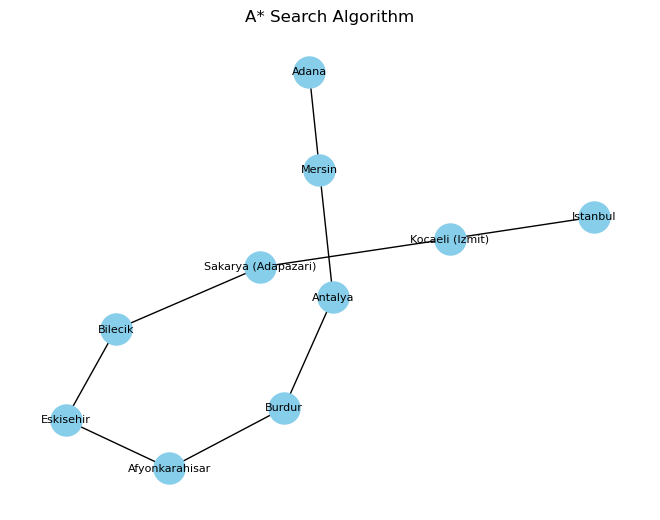

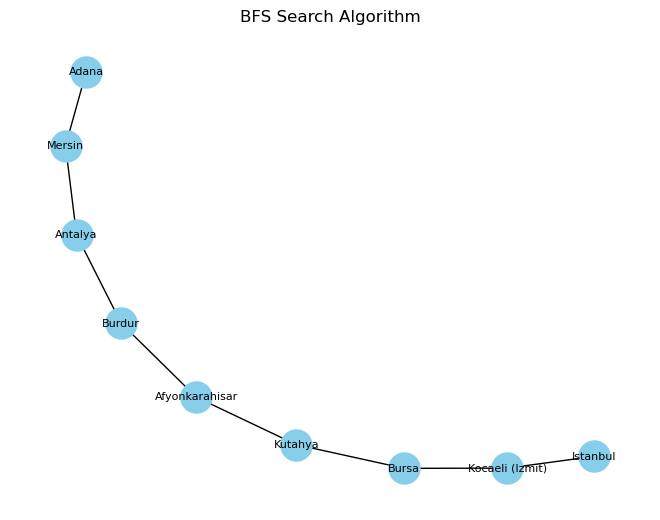

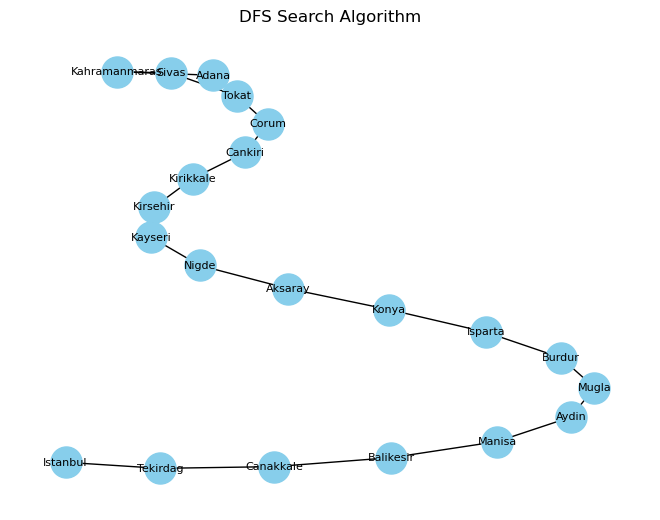

Gidilecek Yol Çıktı Listesi  
1.A* Algoritması çıktı: ['Istanbul', 'Kocaeli (Izmit)', 'Sakarya (Adapazari)', 'Duzce', 'Bolu', 'Karabuk', 'Kastamonu', 'Sinop', 'Samsun', 'Ordu', 'Giresun', 'Gumushane', 'Bayburt', 'Erzurum', 'Agri', 'Van']
2.BFS Algoritması Çıktı: ['Istanbul', 'Kocaeli (Izmit)', 'Bursa', 'Bilecik', 'Eskisehir', 'Cankiri', 'Corum', 'Samsun', 'Ordu', 'Giresun', 'Trabzon', 'Erzurum', 'Agri', 'Van'] 
3.DFS Algoritması Çıktı: ['Istanbul', 'Tekirdag', 'Canakkale', 'Balikesir', 'Manisa', 'Aydin', 'Mugla', 'Burdur', 'Isparta', 'Konya', 'Aksaray', 'Nigde', 'Kayseri', 'Kirsehir', 'Kirikkale', 'Cankiri', 'Corum', 'Tokat', 'Sivas', 'Kahramanmaras', 'Malatya', 'Tunceli', 'Mus', 'Bitlis', 'Van']

 Toplam Uzaklık (km) Istanbul ile Van arası 
1.A* Algoritması Uzaklık: 1828
2.BFS Algoritması Uzaklık: 2155 
3. DFS Algoritması Uzaklık : 3892



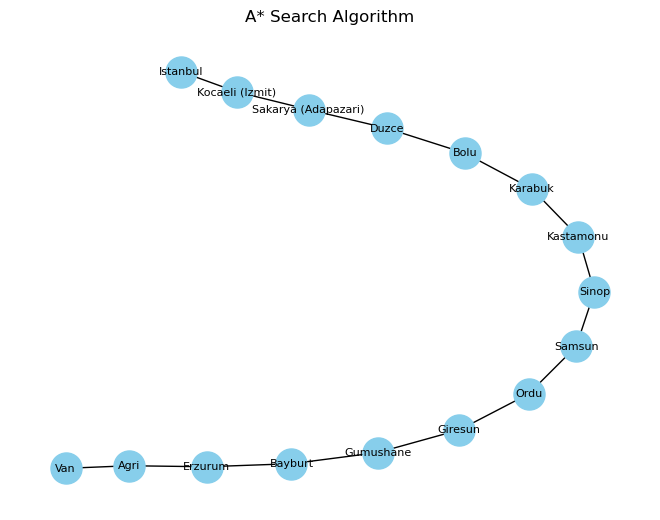

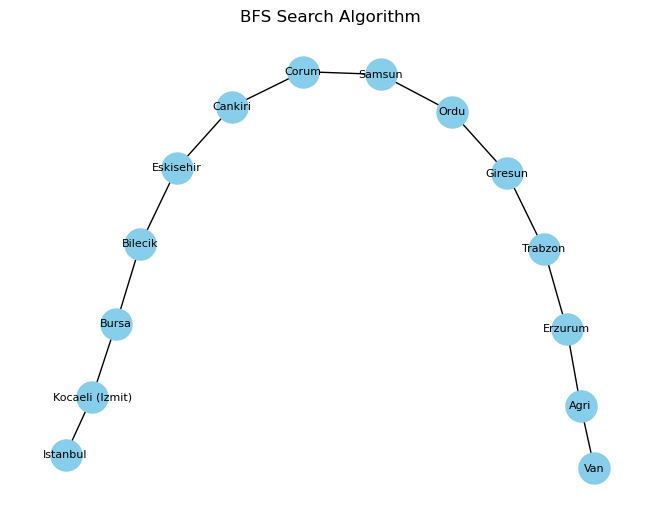

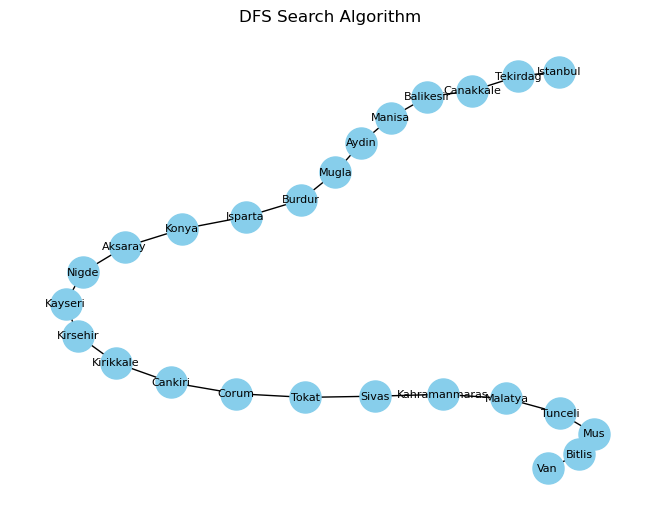

Gidilecek Yol Çıktı Listesi  
1.A* Algoritması çıktı: ['Istanbul', 'Kocaeli (Izmit)', 'Sakarya (Adapazari)', 'Bilecik', 'Eskisehir']
2.BFS Algoritması Çıktı: ['Istanbul', 'Kocaeli (Izmit)', 'Bursa', 'Bilecik', 'Eskisehir'] 
3.DFS Algoritması Çıktı: ['Istanbul', 'Tekirdag', 'Canakkale', 'Balikesir', 'Manisa', 'Aydin', 'Mugla', 'Burdur', 'Isparta', 'Konya', 'Eskisehir']

 Toplam Uzaklık (km) Istanbul ile Eskisehir arası 
1.A* Algoritması Uzaklık: 330
2.BFS Algoritması Uzaklık: 419 
3. DFS Algoritması Uzaklık : 1768



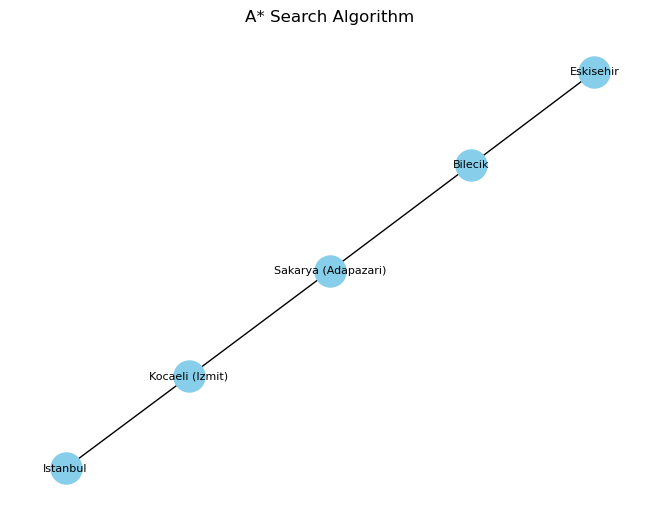

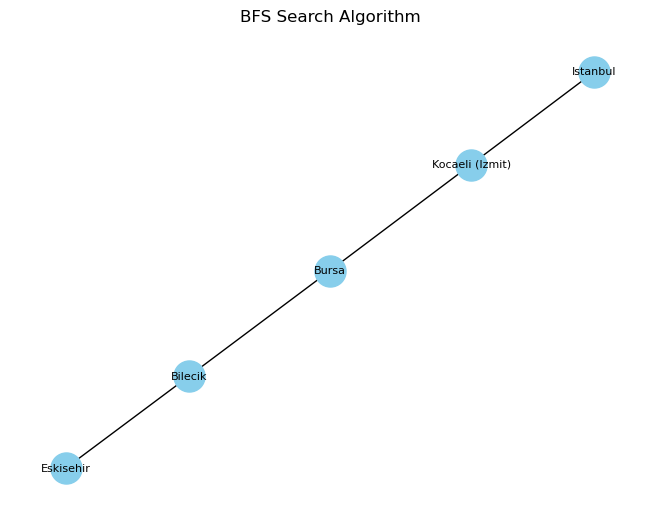

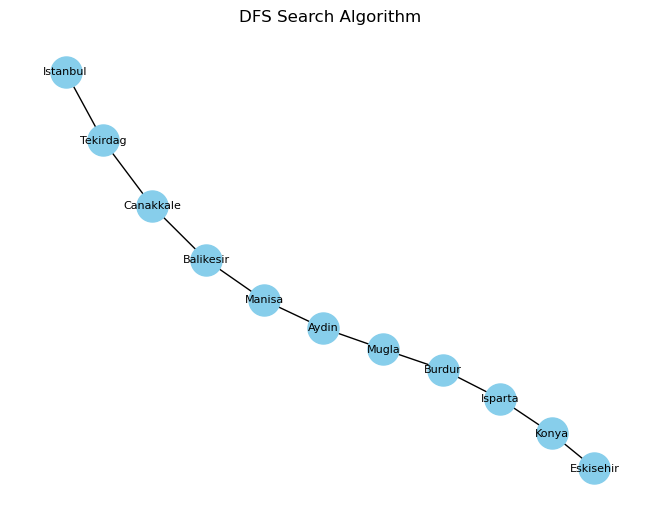

Gidilecek Yol Çıktı Listesi  
1.A* Algoritması çıktı: ['Istanbul', 'Kocaeli (Izmit)', 'Sakarya (Adapazari)', 'Duzce', 'Bolu', 'Ankara']
2.BFS Algoritması Çıktı: ['Istanbul', 'Kocaeli (Izmit)', 'Bursa', 'Bilecik', 'Eskisehir', 'Ankara'] 
3.DFS Algoritması Çıktı: ['Istanbul', 'Tekirdag', 'Canakkale', 'Balikesir', 'Manisa', 'Aydin', 'Mugla', 'Burdur', 'Isparta', 'Konya', 'Ankara']

 Toplam Uzaklık (km) Istanbul ile Ankara arası 
1.A* Algoritması Uzaklık: 455
2.BFS Algoritması Uzaklık: 652 
3. DFS Algoritması Uzaklık : 1690



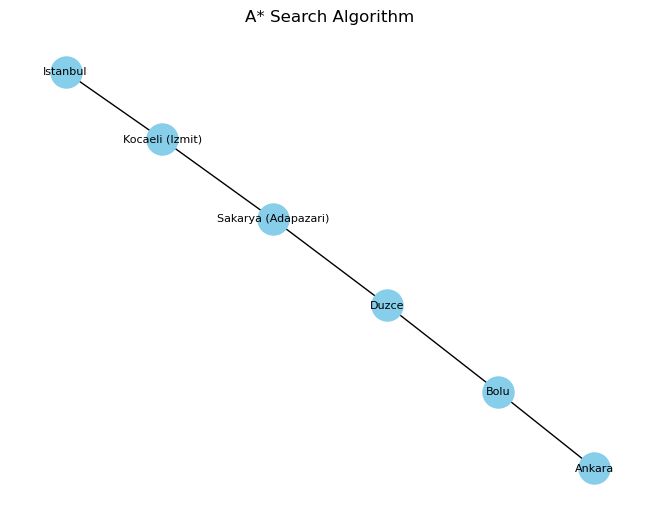

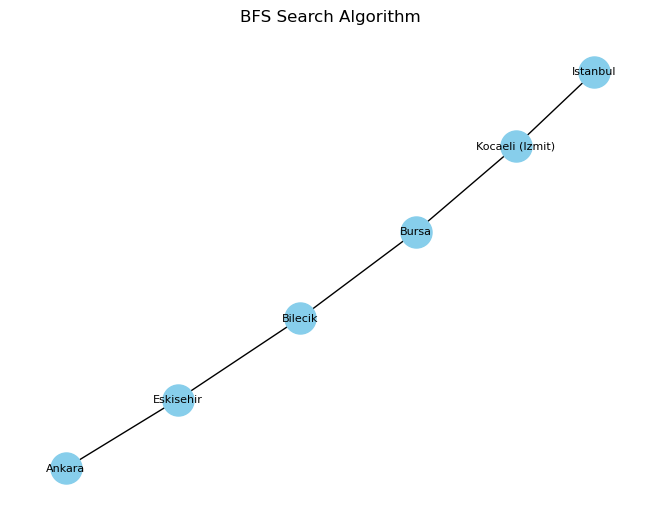

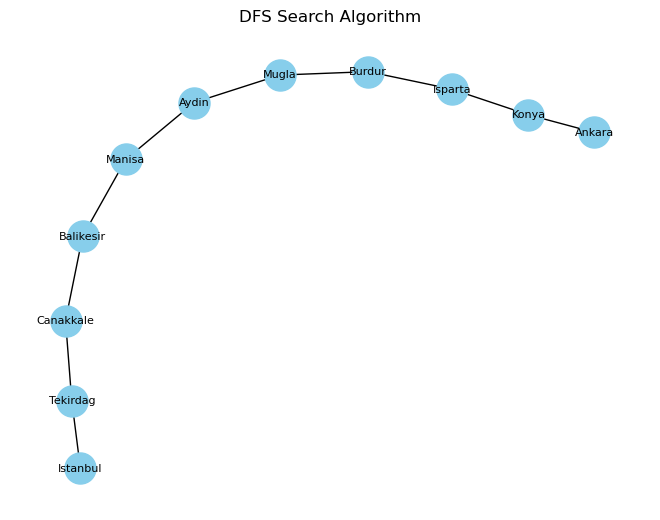

In [11]:
log_travel_info('Istanbul', 'Adana')
log_travel_info('Istanbul', 'Van')
log_travel_info('Istanbul', 'Eskisehir')
log_travel_info('Istanbul', 'Ankara')